In [2]:
%matplotlib inline

import tensorflow as tf

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

import numpy as np
from numpy.random import seed, randint

## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [4]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)


print(type(reviews))
print(reviews[0])
print(Y.head())
reviews.columns

<class 'pandas.core.frame.DataFrame'>
0        bromwell high is a cartoon comedy . it ran at ...
1        story of a man who has unnatural feelings for ...
2        homelessness  or houselessness as george carli...
3        airport    starts as a brand new luxury    pla...
4        brilliant over  acting by lesley ann warren . ...
                               ...                        
24995    i saw  descent  last night at the stockholm fi...
24996    a christmas together actually came before my t...
24997    some films that you pick up for a pound turn o...
24998    working  class romantic drama from director ma...
24999    this is one of the dumbest films  i  ve ever s...
Name: 0, Length: 25000, dtype: object
   0
0  1
1  0
2  1
3  0
4  1


Index([0], dtype='int64')

We need to encode the labels as it is necessary for the Neural network to work.

In [7]:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
Y_one_hot = encoder.fit_transform(Y.to_numpy().reshape(-1, 1))
Y_one_hot

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(reviews[0])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

vectorizer.get_feature_names_out()

array(['aaron', 'abandon', 'abandoned', ..., 'zoom', 'zorro', 'zu'],
      dtype=object)

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [8]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

A single word is represented as one number. The whole review is represented as 10 000 features corresponding to the most frequent words in all reviews. When the word is occurring in the one specific review its count is equal to the number of times it occurs in that review. For instance, the feature names which are ['dog', 'cat', 'dolphin'] in a review: 'I love a cat, but dolphin is my favourite. I could marry a dolphin' will result in a matrix: [0, 1, 2].

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [28]:
seed(0)
tf.random.set_seed(0)

num_classes = len(np.unique(Y_train))

model = Sequential()
model.add(Dense(units = 32, activation='tanh', input_shape=(X_train.shape[1],))) # add a hidden layer
model.add(Dense(units=num_classes, activation='softmax'))  # Output layer

sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 40, verbose = 1, validation_split = 0.2)

Epoch 1/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6812 - loss: 0.5998 - val_accuracy: 0.7980 - val_loss: 0.4446
Epoch 2/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8065 - loss: 0.4382 - val_accuracy: 0.8263 - val_loss: 0.3877
Epoch 3/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8404 - loss: 0.3811 - val_accuracy: 0.8445 - val_loss: 0.3556
Epoch 4/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8564 - loss: 0.3437 - val_accuracy: 0.8570 - val_loss: 0.3332
Epoch 5/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8705 - loss: 0.3158 - val_accuracy: 0.8650 - val_loss: 0.3190
Epoch 6/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8790 - loss: 0.2931 - val_accuracy: 0.8683 - val_loss: 0.3111
Epoch 7/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8886 - loss: 0.2738 - val_accuracy: 0.8692 - val_loss: 0.3079
Epoch 8/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8980 - loss: 0.2565 - val_accura

40 epochs seems like a lot as it took over 3 minutes to run but with a learning rate of 0.01 it slowly reached 95% accuracy on the train data.

In [29]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0763
Loss + accuracy on train data: [0.1383526772260666, 0.953249990940094]


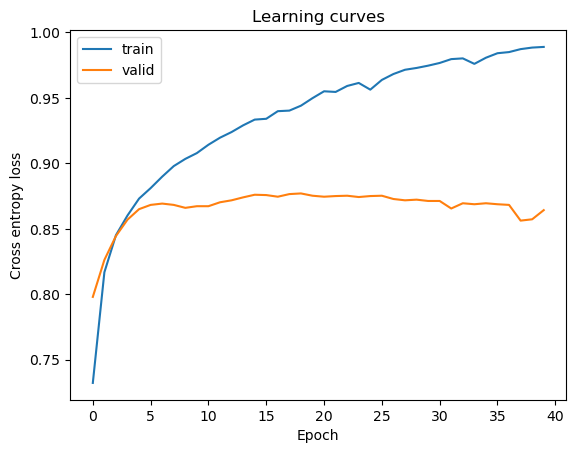

In [30]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [35]:
seed(0)
tf.random.set_seed(0)

num_classes = len(np.unique(Y_train))

model = Sequential() # initialize a neural network
model.add(Dense(units = 50, activation='sigmoid', input_shape=(X_train.shape[1],))) # add a hidden layer
model.add(Dense(units=num_classes, activation='silu'))  # Output layer
# The Swish (or Silu) activation function is a smooth, non-monotonic function that is unbounded above and bounded below.

adam = optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
#Try different loss functions and different optimizers

history = model.fit(X_train, Y_train, epochs = 15, verbose = 1, validation_split = 0.2)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4974 - loss: 4.3899 - val_accuracy: 0.5017 - val_loss: 4.3044
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4991 - loss: 4.1630 - val_accuracy: 0.5035 - val_loss: 4.2642
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5016 - loss: 4.1436 - val_accuracy: 0.5265 - val_loss: 4.3364
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5157 - loss: 4.1082 - val_accuracy: 0.5170 - val_loss: 4.4202
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5189 - loss: 4.1083 - val_accuracy: 0.5217 - val_loss: 4.4747
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5332 - loss: 4.1174 - val_accuracy: 0.5213 - val_loss: 4.4857
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5429 - loss: 4.1865 - val_accuracy: 0.8625 - val_loss: 6.8746
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6975 - loss: 4.4579 - val_accuracy: 0.

Okay interesting, this one did almost the same job as the previous one but in less epochs, so I will go with this one. 

In [36]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.2724
Loss + accuracy on train data: [0.5141831636428833, 0.9526000022888184]


**(d)** Test your sentiment-classifier on the test set.

In [37]:
print("Loss + accuracy on TEST data: {}".format(model.evaluate(X_test, Y_test)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8643 - loss: 1.5914
Loss + accuracy on TEST data: [1.574142575263977, 0.8622000217437744]


That's not bad, 86 percent is a decent result, but it could be a sign that the model is overfitting slightly.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [51]:
comments = ["Honestly, I haven't seen a movie that left me so unsatisfied in a long time.", # 0 - negative
            'Oh my good, this movie was crazy.',  # 1 - positive yet ambigous
            'Spending three hours to watch that?', # 0 - negative
            'Three hours well spent!',# 1 - positive but also ambiguous 
            'I really liked this movie, I would highly recommend it to anyone who is into comedy!', # 1 - definitely positive
            'The plot is unconventional and unexpected. It is a refreshing act in comparison to what is served to the masses these days.' # 1 - positive but bitter
            ] 

pd_comments =  pd.DataFrame(comments)
trans_comments=vectorizer.transform(pd_comments[0])


probabilities = np.array(model.predict(trans_comments))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict

print("Predictions = {}".format(predictions[0:30]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predictions = [0 0 0 0 1 1]


It is doing pretty well. Maybe the problem was that I came with the mindset of trying to trick the model by making something sound bad yet making it a positive comment. On the ones that are straightforward it does a good job. Let's try getting few reviews from the internet about Barbie and Oppenheimer.

In [52]:
oppenheimer_barbie = ["You'll have to have your wits about you and your brain fully switched on watching Oppenheimer as it could easily get away from a nonattentive viewer. This is intelligent filmmaking which shows it's audience great respect. It fires dialogue packed with information at a relentless pace and jumps to very different times in Oppenheimer's life continuously through it's 3 hour runtime. There are visual clues to guide the viewer through these times but again you'll have to get to grips with these quite quickly. This relentlessness helps to express the urgency with which the US attacked it's chase for the atomic bomb before Germany could do the same. An absolute career best performance from (the consistenly brilliant) Cillian Murphy anchors the film. This is a nailed on Oscar performance. In fact the whole cast are fantastic (apart maybe for the sometimes overwrought Emily Blunt performance). RDJ is also particularly brilliant in a return to proper acting after his decade or so of calling it in. The screenplay is dense and layered (I'd say it was a thick as a Bible), cinematography is quite stark and spare for the most part but imbued with rich, lucious colour in moments (especially scenes with Florence Pugh), the score is beautiful at times but mostly anxious and oppressive, adding to the relentless pacing. The 3 hour runtime flies by. All in all I found it an intense, taxing but highly rewarding watch. This is film making at it finest. A really great watch.",
                      "I really wanted to like this movie but I struggled to stay awake through it. For me it had none of the nuanced beauty of The Imitation Game, but rather a lot of political waffle, which left me sadly caring more about when it was finally going to end, than what happened to any of the characters. I know I'm in the minority here but I also thought that whilst there were some very strong performances, I didn't feel any were really Oscar worthy. I would think that if someone was in to politics and the american post-war fear around communism, then this could be an interesting watch for them. With all the great names attached, Christopher Nolan at the helm, and a lot of media attention, I expected a lot, but was ultimately left thinking; style over substance.",
                      "As much as it pains me to give a movie called 'Barbie' a 10 out of 10, I have to do so. It is so brilliantly handled and finely crafted, I have to give the filmakers credit. Yes, I am somewhat conservative person and former law enforcement officer. I'm a guy. I like guy things. Hell I even enjoyed the Battleship movie a few years ago (an absolutely ridiculous but fun romp of an action film). But I also like to experience other perspectives. And man oh man does this movie deliver that in spades - pretty much encapsulated everything my wife has tried to convey about her entire career and life experience wrapped up into two hours! The humor, the sets, the acting, and the ability to weave the current narrative into the story was just perfect. I don't agree with some of the points of the movie, but again, that's ok. This movie wasn't designed to give a balanced perspective of men versus women; it is a no-holds-barred unapologetic crazy ride of a rant about the real issues that women have faced since they were 'allowed' to have 'real jobs' and do the same things as men. Give me a well done film that is a blast to watch, that makes you think, and that was done from a place of creativity, passion, and attention to detail, and I'll call it what it is: a 10 out of 10 masterpiece.",
                      "Margot Robbie and Ryan Gosling are really great in their roles of Barbie and Kent. Gosling is specially hilarious. I expected a funny, cool, deep and entertaining movie, but I was highly disappointed. The movie is so terribly preachy that ends being an embarrassment. We (the audience) have brains, so, please, preach somewhere else. Furthermore, this is a movie to divide, not to unite. And I'm a woman. The script of the movie is horrendous and the direction is plain bad. There are some great actresses that have too little to say, like Emma Mackey, and that's a pity. Overall: a huge disappointment and a missed opportunity. 3/10 (1 point for Margot Robbie, 1 point for Ryan Gosling, and 1 point for the art direction (super tacky and pinky, as Barbie's world)."]
#So I added two reviews for each movie, [1, 0, 1, 0]


pd_comments =  pd.DataFrame(oppenheimer_barbie)
trans_comments=vectorizer.transform(pd_comments[0])


probabilities = np.array(model.predict(trans_comments))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict

print("Predictions = {}".format(predictions[0:30]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions = [1 0 1 0]


On the real data the model doesn't miss! That is so interesting to see, but also something to be aware of as we can predict the people's emotions with a machine learning model and this gives a lot of ground for a malicous usage of such great tools. 